Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 1.60E+00
	diameter = 1.0E-01, distance = 1.60E-01
	diameter = 1.0E-02, distance = 1.60E-02
	diameter = 1.0E-03, distance = 1.60E-03
	diameter = 1.0E-04, distance = 1.60E-04
	diameter = 1.0E-05, distance = 1.60E-05
Done!


Convergence Order:1.0000000020244175 prefactor K:1.6045887032133328


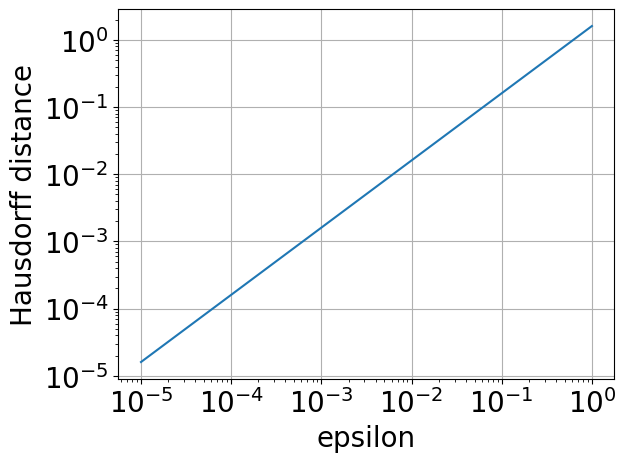

Pooling executed


In [1]:
from graphing.helper import convergence_analysis
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
# Constants
pooling_obj=-1338.2471283376406
pooling_sol = {
    'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
    'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
}

pooling_y_bound = {
    'A[1]': [0, 300], 'A[2]': [0, 250], 'A[3]': [0, 0], 'A[4]': [0, 0], 'A[5]': [0, 300],
    'S[1]': [0, 400], 'S[2]': [0, 0], 'S[3]': [0, 0], 'S[4]': [0, 500]
}
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['lambd[1]'] = 1
binary_y_val['lambd[2]'] = 1
binary_y_val['lambd[5]'] = 1
binary_y_val['theta[1]'] = 1
binary_y_val['theta[4]'] = 1
m.fix_binary_y(binary_y_val)

alg=CaoZavalaAlgo(m,solver="baron")
convergence_analysis(alg,pooling_sol,pooling_obj,start=-5,stop=0,steps=6,name="Pooling")
print("Pooling executed")